# Evaluation of the Nescience class

In [1]:
import numpy as np

from fastautoml.fastautoml import Nescience, Miscoding, Inaccuracy, Surfeit

from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_digits

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

In [2]:
rcParams['figure.figsize'] = 10, 10

#### Nescience of a decision tree classifier

In [3]:
data = load_digits()
X = data.data
y = data.target

In [4]:
tree = DecisionTreeClassifier()
tree.fit(X, y)
tree.score(X, y)

1.0

In [5]:
nescience = Nescience()
nescience.fit(X, y)

Nescience()

In [6]:
nescience.nescience(tree)

0.5895603819965907

#### Comparison

In [26]:
data = load_breast_cancer()
X = data.data
y = data.target

In [27]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X, y)
tree.score(X, y)

0.9789103690685413

In [28]:
nescience = Nescience()
nescience.fit(X, y)
nescience.nescience(tree)

0.5828271693100483

In [31]:
nn = MLPClassifier()
nn.fit(X, y)
nn.score(X, y)

0.9314586994727593

In [32]:
nescience.nescience(nn)

0.7790937701407318

#### Evolution of Nescience

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target

In [33]:
lmiscoding  = list()
linaccuracy = list()
lredudancy  = list()
lnescience  = list()
lcrossval   = list()

miscoding = Miscoding()
miscoding.fit(X, y)

inaccuracy = Inaccuracy()
inaccuracy.fit(X, y)

surfeit = Surfeit()
surfeit.fit(X, y)

nescience = Nescience()
nescience.fit(X, y)

for i in range(1, 10):
    
    tree = DecisionTreeClassifier(max_depth=i)
    tree.fit(X, y)
    
    lmiscoding.append(miscoding.miscoding_model(tree))
    linaccuracy.append(inaccuracy.inaccuracy_model(tree))
    lredudancy.append(surfeit.surfeit_model(tree))
    lnescience.append(nescience.nescience(tree))

    scores = cross_val_score(tree, X, y, cv=30)
    lcrossval.append(1 - scores.mean())

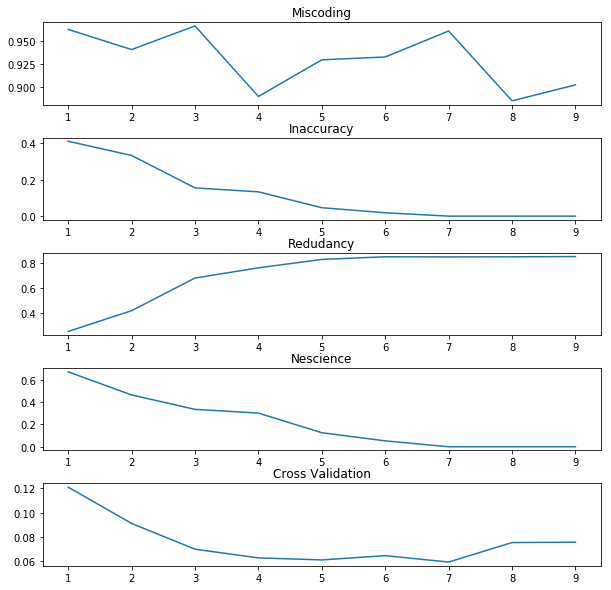

In [34]:
fig, axs = plt.subplots(5, gridspec_kw={'hspace': 0.4, 'wspace': 0})

axs[0].plot(range(1, 10), lmiscoding)
axs[0].set_title('Miscoding')
axs[0].set_xticks(range(1, 10))
axs[0].set_xticklabels(range(1, 10))

axs[1].plot(range(1, 10), linaccuracy)
axs[1].set_title('Inaccuracy')
axs[1].set_xticks(range(1, 10))
axs[1].set_xticklabels(range(1, 10))

axs[2].plot(range(1, 10), lredudancy)
axs[2].set_title('Redudancy')
axs[2].set_xticks(range(1, 10))
axs[2].set_xticklabels(range(1, 10))

axs[3].plot(range(1, 10), lnescience)
axs[3].set_title('Nescience')
axs[3].set_xticks(range(1, 10))
axs[3].set_xticklabels(range(1, 10))

axs[4].plot(range(1, 10), lcrossval)
axs[4].set_title('Cross Validation')
axs[4].set_xticks(range(1, 10))
axs[4].set_xticklabels(range(1, 10))

plt.show()

In [36]:
np.where(lnescience == np.min(lnescience))

(array([7]),)

In [35]:
np.where(lcrossval == np.min(lcrossval))

(array([6]),)

### Hyperparameters Selection

In [74]:
import numpy as np

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import load_digits

Implement an scoring object based on the Nescience class

In [87]:
from fastautoml.fastautoml import Nescience

def my_custom_loss_func(estimator, X, y):
    
    nsc = Nescience()
    nsc.fit(X, y)
    nescience = nsc.nescience(estimator)
    
    # scikit-learn expect that higher numbers are better
    score = -nescience
    
    return score

Load dataset

In [76]:
data = load_digits()

In [77]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=0)

Multilayer Perceptron

In [79]:
from sklearn.neural_network import MLPClassifier

In [80]:
parameters = {'solver': ['lbfgs'],
              'max_iter': [1000, 1500, 2000 ], 
              'alpha': 10.0 ** -np.arange(1, 10, 3),
              'hidden_layer_sizes':[(60,), (100,), (60, 60,), (100, 100,), (60, 60, 60,), (100, 100, 100,)]}

'score' based search

In [81]:
clf_std = GridSearchCV(estimator=MLPClassifier(), param_grid=parameters, cv=3, iid=True, n_jobs=-1)

In [82]:
clf_std.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'solver': ['lbfgs'], 'max_iter': [1000, 1500, 2000], 'alpha': array([1.e-01, 1.e-04, 1.e-07]), 'hidden_layer_sizes': [(60,), (100,), (60, 60), (100, 100), (60, 60, 60), (100, 100, 100)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [83]:
clf_std.best_params_

{'alpha': 0.1,
 'hidden_layer_sizes': (100,),
 'max_iter': 1000,
 'solver': 'lbfgs'}

In [84]:
y_true, y_pred = y_test, clf_std.predict(X_test)
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        45
          1       0.89      0.98      0.94        52
          2       1.00      0.98      0.99        53
          3       1.00      0.98      0.99        54
          4       0.98      1.00      0.99        48
          5       0.98      0.98      0.98        57
          6       1.00      0.98      0.99        60
          7       1.00      0.96      0.98        53
          8       0.96      0.90      0.93        61
          9       0.93      0.98      0.96        57

avg / total       0.98      0.97      0.97       540



'nescience' based search

In [88]:
clf_nsc = GridSearchCV(estimator=MLPClassifier(), param_grid=parameters, cv=3, scoring=my_custom_loss_func, iid=True)

In [89]:
clf_nsc.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'solver': ['lbfgs'], 'max_iter': [1000, 1500, 2000], 'alpha': array([1.e-01, 1.e-04, 1.e-07]), 'hidden_layer_sizes': [(60,), (100,), (60, 60), (100, 100), (60, 60, 60), (100, 100, 100)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=<function my_custom_loss_func at 0x7f31b39138c8>, verbose=0)

In [90]:
clf_nsc.best_params_

{'alpha': 0.1,
 'hidden_layer_sizes': (60,),
 'max_iter': 1500,
 'solver': 'lbfgs'}

In [91]:
y_true, y_pred = y_test, clf_nsc.predict(X_test)
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        45
          1       0.93      1.00      0.96        52
          2       1.00      0.98      0.99        53
          3       1.00      0.98      0.99        54
          4       0.98      0.98      0.98        48
          5       0.98      0.96      0.97        57
          6       0.97      1.00      0.98        60
          7       0.98      0.96      0.97        53
          8       0.98      0.93      0.96        61
          9       0.97      0.98      0.97        57

avg / total       0.98      0.98      0.98       540

